In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pylab as plt
from sympy import *

# Téma: Náhodné vektory

**Níže uvedené vztahy mají předpoklady, které zde zůstanou nevyřčeny. Typicky jde o existenci konečných momentů, viz přednáška.**

## Motivace

Podívejme se na směnné kurzy České národní banky pro páry CZK-EUR a CZK-USD v období 1.1.2018 - 14.11.2018. Vykreslíme si pro začátek dva grafy - jeden s **vývojem obou kurzů** za uvedených 220 dní, druhý tzv. **bodový graf** (scatter plot), na kterém bude vidět případná provázanost obou kurzů - každý bod má jako souřadnice jednu z 220 **realizací náhodného vektoru** [X, Y] = [CZK-EUR, CZK-USD]. Pracujeme tedy s **výběrem** z náhodné veličiny, nikoliv s náhodnou veličinou - to budeme dělat v teorii níže.

Text(0,0.5,'CZK-USD')

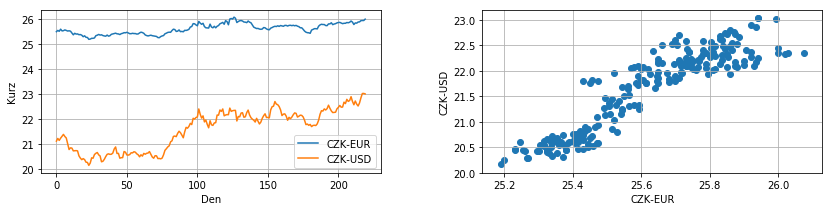

In [2]:
fn = 'data/cnb2018.txt'
data_raw = np.genfromtxt(fn, delimiter='|', skip_header=1)
czk_eur = data_raw[:,8]
czk_usd = data_raw[:,-3]

plt.figure(figsize=(14,3))
plt.subplot(121)
plt.plot(czk_eur, label='CZK-EUR')
plt.plot(czk_usd, label='CZK-USD')
plt.xlabel('Den')
plt.ylabel('Kurz')
plt.legend()
plt.subplot(122)
plt.scatter(czk_eur, czk_usd)
plt.xlabel('CZK-EUR')
plt.ylabel('CZK-USD')

Můžeme se podívat na pár popisných statistik. Všimněte si, že nejsou nijak závislé mezi veličinami vektoru [X,Y]. Vykreslíme navíc boxplot.

CZK-EUR: průměr: 25.61, medián: 25.61, variance: 0.04, min: 25.19, max: 26.07
CZK-USD: průměr: 21.60, medián: 21.83, variance: 0.63, min: 20.16, max: 23.03


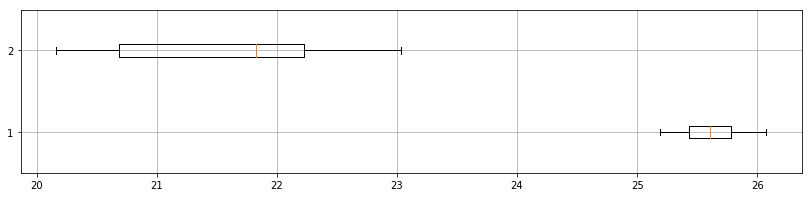

In [3]:
print('CZK-EUR: průměr: {0:.2f}, medián: {1:.2f}, variance: {2:.2f}, min: {3:.2f}, max: {4:.2f}'
      .format(czk_eur.mean(), np.median(czk_eur), czk_eur.var(), czk_eur.min(), czk_eur.max()))
print('CZK-USD: průměr: {0:.2f}, medián: {1:.2f}, variance: {2:.2f}, min: {3:.2f}, max: {4:.2f}'.
      format(czk_usd.mean(), np.median(czk_usd), czk_usd.var(), czk_usd.min(), czk_usd.max()))

plt.figure(figsize=(14,3))
plt.boxplot((czk_eur, czk_usd), vert=False)
plt.show()

Ze scatterplotu výše vidíme, že data jsou nějakým způsobem lineárně provázaná - scatterplotem by šla dobře proložit přímka. Provázanost zjistíme z tzv. (výběrové) **kovarianční matice**, nebo ještě lépe z její **normalizované** podoby - (výběrové) **matice korelační**. Hodnoty lineárních korelačních koeficientů jsou z intervalu [-1, 1], přičemž čím blíže $\pm 1$, tím silnější je lineární vazba mezi veličinami. Pro hodnoty kladné říkáme, že proměnné jsou kladně korelované, pokud je hodnota 1, potom jedna proměnná je přesnou lineární transformací druhé a mezi proměnnými je přímá úměra. Při hodnotách záporných je úměra nepřímá a korelace jsou záporné, při hodnotě 0 jsou proměnné nekorelované.

In [4]:
print('Kovarianční matice:\n', np.cov(czk_eur, czk_usd))
print('\nKorelační matice:\n', np.corrcoef(czk_eur, czk_usd))

Kovarianční matice:
 [[0.04342834 0.15249091]
 [0.15249091 0.63468969]]

Korelační matice:
 [[1.         0.91849469]
 [0.91849469 1.        ]]


Obě proměnné jsou docela obstojně korelované, zkusíme využít jednu k predikci druhé (což samozřejmě nebude hitparáda).

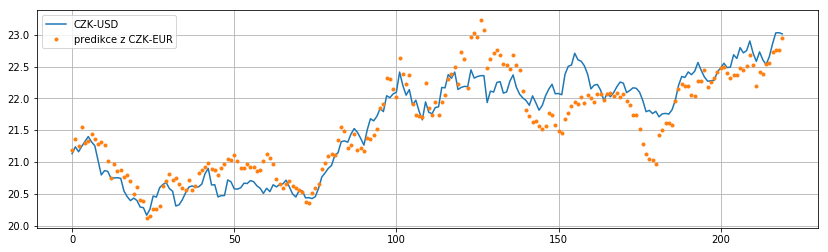

In [5]:
b1, b0, _, _, _ = ss.linregress(czk_eur, czk_usd)
plt.figure(figsize=(14,4))
plt.plot(czk_usd, label='CZK-USD')
plt.plot(b0+b1*czk_eur, '.', label='predikce z CZK-EUR')
plt.legend()
plt.show()

## Teorie

Nechť náhodné veličiny $X_1,\ldots, X_n$ jsou definovány na stejném pravděpodobnostním prostoru $(\Omega, \mathcal{F}, P)$. Pak nazýváme $X=[X_1,\ldots,X_n]$ **náhodným vektorem**.

Zavádíme - analogicky ke skalárním veličinám:

**Distribuční funkci náhodného vektoru $X$** (též **sdruženou distribuční fci** veličin):

$$
F(X) = F(x_1,\ldots,x_n) = P(X_1\leq x_1, \ldots, X_n\leq x_n).
$$

**Střední hodnotu vektoru $X$**

$$
EX = E[X_1,\ldots,X_n] = [EX_1,\ldots,EX_n]
$$

**Kovarianci veličin $X_i$ a $X_j$ [(wiki)](https://en.wikipedia.org/wiki/Covariance)**

$$
\operatorname{cov}(X_i, X_j) = E\left[(X_i-EX_i)(X_j-EX_j)\right]
= E(X_iX_j) - EX_i \cdot EX_j.
$$

**(Ko)varianční matici vektoru $X$**

$$
V = E\left[(X-EX)(X-EX)^\intercal\right] = E(XX^\intercal) - (EX)(EX)^\intercal.
$$

Je dobré si povšimnout, že (ko)varianční matice vektoru $X=[X_1,\ldots,X_n]$ má na diagonále $\operatorname{cov}(X_i,X_i) = E[(X_i -EX_i)^2] = \operatorname{var}X_i$, tedy rozptyly (variance) veličin. A rovněž, pohledem na definici, že $\operatorname{cov}(X_i,X_j) = \operatorname{cov}(X_j,X_i)$. Matice je tedy symetrická.


**Korelační koeficient (lineární, Pearsonův) [(wiki)](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)**


Koeficient s hodnotami v intervalu [-1,1] vyjadřuje míru lineárnosti vztahu mezi dvěma veličinami.

$$
\rho(X_i, X_j) = \frac{\operatorname{cov}(X_i, X_j)}{\sqrt{\operatorname{var}X_i\cdot \operatorname{var}X_j}}
$$

Můžeme jej rovněž dát do matice, potom máme na diagonále hodnoty 1 a matice je symetrická. Pár příkladů viz obrázek z wikipedie.

![corr](img/corrwiki.png)

## Spojitý případ

Povíme si více pouze o spojitém případu, protože už víme, že diskrétní je obdobný, jen vyměníme integrály za sumy a hustoty za pravděpodobnosti.

**Sdružená distribuční funkce $[x_1,\ldots,x_n]$ [(wiki)](https://en.wikipedia.org/wiki/Joint_probability_distribution)** - integrál sdružené hustoty přes všechny veličiny

$$
F(x_1,\ldots,x_n) = \int_{-\infty}^{x_1} \cdots \int_{-\infty}^{x_n} f(u_1,\ldots, u_n) du_1\ldots du_n.
$$

**Sdruženou hustotu $[x_1,\ldots,x_n]$** dostaneme naopak ze sdružené distribuční funkce derivacemi přes všechny proměnné,

$$
f(x_1,\ldots,x_n) = \frac{\partial^n F(x_1,\ldots,x_n)}{\partial x_1\cdots\partial x_n}.
$$

**Marginální hustota veličiny $X_1$** - dostaneme vyintegrováním všech ostatních veličin přes celý obor,

$$
f(x_1) = \int_\mathbb{R}\cdots\int_\mathbb{R} f(x_1,\ldots,x_n) dx_2\ldots dx_n.
$$

Analogicky zavádíme **marginální distribuční funkci** $F(x_1)=F(x_1,\infty,\ldots,\infty)$. Marginální hustoty i distribuční funkce mohou být definovány i pro libovolnou podmnožinu náhodných veličin ze souboru, ne jen pro jednu.

**Podmíněná hustota** - vzpomeňte si, jak byla definována podmíněná pravděpodobnost. Zde je to podobné,

$$
f(x_1|x_2,\ldots,x_n) = \frac{f(x_1,\ldots,x_n)}{f(x_2,\ldots,x_n)}.
$$

To plyne z tzv. řetězového pravidla

$$
f(x_1,x_2,\ldots,x_n) = f(x_1|x_2,\ldots,x_n)\cdot f(x_2,\ldots,x_n).
$$

Opět na pravé straně může být libovolná náhodná veličina či část jejich souboru. S podmíněnou hustotou můžeme počítat podmíněnou střední hodnotu aj.

### Příklad - dvourozměrná normální distribuce

Podívejme se na dvourozměrnou normální distribuci 

$$
(X,Y) \sim \mathcal{N}(\mu, \Sigma) = 
\mathcal{N}
\left(
\begin{bmatrix}
\mu_X \\ \mu_Y
\end{bmatrix}
,
\begin{bmatrix}
\sigma_X^2 & \sigma_{XY} \\
\sigma_{XY} & \sigma_Y^2
\end{bmatrix},
\right)
$$

Všechny zobrazené hustoty (contour-ploty a prostorové grafy) jsou centrované v nule, ale s různými kovariančními maticemi. Vysledujte, jak se s kovariancemi mění tvar hustoty.

![gauss](img/2dgauss-surface.jpg)
![gauss](img/2dgauss-contour.jpg)

**Marginální hustoty** jsou průměty do ploch za prostorovými grafy - jsou to (zde) opět hustoty normálních rozdělení, ale jen jednorozměrné.

## Nezávislost  [(wiki)](https://en.wikipedia.org/wiki/Independence_(probability_theory)  )

Řekneme, že $X_1,\ldots,X_n$ jsou nezávislé náhodné veličiny, pokud pro všechna reálná $x_1,\ldots,x_n$ platí

$$
F(x_1,\ldots,x_n) = F_1(x_1)\cdots F_n(x_n).
$$

Nebo analogicky, pro **hustotu pravděpodobnosti nezávislých veličin** platí

$$
f(x_1,\ldots,x_n) = f_1(x_1)\cdots f_n(x_n).
$$

*Vzpomeňte, jak to bylo s pravděpodobnostmi a podmíněnými pravděpodobnostmi jevů při nezávislosti! Stejným způsobem zde ověřujeme nezávislost.*

Pro **střední hodnotu** součinu **nezávislých** náhodných veličin platí

$$
E(X_1\cdots X_n) = EX_1\cdots EX_n
$$

a pro **varianci** jejich součtu

$$
\operatorname{var}(X_1+\ldots+X_n) = \operatorname{var}X_1 + \ldots + \operatorname{var} X_n.
$$

Pokud pro dvě veličiny platí platí

$$
\operatorname{cov}(X,Y) = 0,
$$

říkáme, že jsou **nekorelované**. Nezávislé veličiny jsou nekorelované, opačná implikace ale neplatí. Stejně tak to neplatí u střední hodnoty.

## Příklad - rozpoznávání textu

*(Vraťte se k notebooku `Podminene_psti_a_Bayes` k podobnému příkladu a projděte si jej. Zjistíte, že už vlastně umíte pracovat s vektory :)*

**Řešíme OCR, hodnoty kódujeme následovně:**
$$
\begin{align}
\text{Světelné podmínky}:\qquad X &=
\begin{cases}
1 & \text{dobré},\\
2 & \text{špatné}.
\end{cases}
\\
\text{Rozpoznání}:\qquad Y &=
\begin{cases}
0 & \text{bez chyb},\\
\frac{1}{2} & \text{s drobnými chybami}, \\
1 & \text{nepřijatelné}.
\end{cases}
\end{align}
$$

Z dat máme zjištěno, že dvojice $(X,Y)$ - realizace náhodného vektoru - mají **sdruženou hustotu** (pravděpodobnostní funkci - jak jsme ji dostali?)

| **X\Y** | **0**   | **1/2**   | **1** |
| ---     | --- | ------------- | --- |
| **1**   | 0.4 | 0.15          | 0.05|
| **2**   | 0.3 | 0.06          | 0.04|

**a) Najděte a interpretujte marginální rozdělení náhodných veličin $X$ a $Y$.**

Vysčítáme řádky (pro $X$) a sloupce (pro $Y$) - doplním do tabulky:

| **X\Y** | **0**   | **1/2**   | **1** | **P(X)** |
| ---     | --- | ------------- | --- | --- |
| **1**   | 0.4 | 0.15          | 0.05| **0.6** |
| **2**   | 0.3 | 0.06          | 0.04| **0.4** |
| **P(Y)**|**0.7**| **0.21** | **0.09** | |

**b) Jsou $X$ a $Y$ nezávislé?**

Nejsou, $P(X,Y)\ne P(X)P(Y)$.

**d) Najděte a interpretujte podmíněné rozdělení pro $X$ dáno $Y=y$.**

Opět snadno podle vzorce,

$$
P(X|Y=y) = \frac{P(X,Y)}{P(Y)},
$$

tedy jen podělíme tabulku hodnotami $P(Y)$,

| **X\Y** | **0**   | **1/2**   | **1** |
| ---     | --- | ------------- | --- |
| **1**   | 4/7 | 0.15/0.21=5/7 | 5/9 |
| **2**   | 3/7 | 0.06/0.21=2/7 | 4/9 |

Vidíte Bayesovu větu? ;-)

## Součty veličin

Pro náhodné veličiny $X,Y$ s konečnými druhými momenty platí:

$$
\begin{align}
E(X+Y) &= EX + EY \\
\operatorname{var}(X+Y) &= \operatorname{var}X + \operatorname{var}Y  + 2\operatorname{cov}(X,Y).
\end{align}
$$

Zde je i jasné, proč nezávislé veličiny mají výše uvedený zjednodušený vztah pro varianci jejich součtu. Distribuci součtu potom zjišťujeme [konvolucí](https://en.wikipedia.org/wiki/Convolution).

---

## Příklad (7.7)

**Nechť $X_1$ a $X_2$ jsou dvě nezávislé veličiny se střední hodnotou $\mu$ a rozptylem $\sigma^2$.**

**a) Najděte střední hodnotu a rozptyl náhodných veličin v tabulce:**

| veličina | $EY_i$ | $\operatorname{var}Y_i$ |
|---|---|---|
|$Y_1 = X_1+X_2$ | ? | ? |
|$Y_2 = 2X_1$| ? | ? |
|$Y_3 = X_1-X_2$| ? | ? |

**Řešení** - mysleme na transformace náhodných veličin, viz minulé cvičení!

| veličina | $EY_i$ | $\operatorname{var}Y_i$ |
|---|---|---|
|$Y_1 = X_1+X_2$ | $2\mu$ | $2\sigma^2$|
|$Y_2 = 2X_1$| $2\mu$ | $4\sigma^2$ |
|$Y_3 = X_1-X_2$| 0 | $2\sigma^2$ |


**b) Spočtěte kovarianci všech dvojic veličin $Y_i$**

Kovariance najdeme v kovarianční matici náhodného vektoru $Y=[Y_1, Y_2, Y_3]$. Připomeňme, že $\operatorname{cov}(A,B) = \operatorname{cov}(B,A)$, matice bude tedy symetrická a na diagonále nalezneme variance veličin, neboť $\operatorname{cov}(A,A) = \operatorname{var}A$. Při výpočtu využijeme vztahy

$$
\begin{align}
\operatorname{var}X_i &= E(X_i^2) - (EX_i)^2,\\
\operatorname{cov}(X_i, X_j) &= E(X_iX_j) - EX_i \cdot EX_j.
\end{align}
$$

Tím se dopracujeme k výsledným kovariancím (uspořádaným níže do matice):

$$
\operatorname{cov}(Y) =
\begin{bmatrix}
2\sigma^2 & 2\sigma^2 & 0\\
2\sigma^2 & 4\sigma^2 & 2\sigma^2 \\
0 & 2\sigma^2 & 2\sigma^2
\end{bmatrix}
$$

Protože i "mistr" se může zaseknout, ukažme si postup pro jeden z prvků:

$$
\begin{alignat*}{2}
\operatorname{cov}(Y_1, Y_2) 
&= E[Y_1 Y_2] - EY_1 EY_2 &&\qquad\text{(z definice výše)} \\
&= E[(X_1 + X_2)\cdot 2 X_1] - EY_1 EY_2 &&\qquad\text{(z definice $Y_1, Y_2$)} \\
&= E[2X_1^2] + E[2X_1 X_2] - EY_1 EY_2 && \\
&= 2E[X_1^2] + 2E[X_1]E[X_2] - EY_1 EY_2 &&\qquad\text{(z nezávislosti $X_1, X_2$)} \\
&= 2[\operatorname{var}X_1 + (EX_1)^2] + 2E[X_1]E[X_2] - EY_1 EY_2 &&\qquad\text{(z definice variance výše)} \\
&= 2\sigma^2 + 2\mu^2 + 2\mu^2 - 4\mu^2 && \\
&= 2\sigma^2. &&
\end{alignat*}
$$


**c) Co lze říci o nezávislosti veličin $Y_1, Y_2, Y_3$?**

Pohledem na definice veličin:

- $Y_1, Y_2$ nejsou nezávislé
- $Y_2, Y_3$ nejsou nezávislé
- $Y_1, Y_3$ nelze rozhodnout

## Příklad (7.1)
**Nechť náhodný vektor $(X,Y)$ má sdruženou hustotu (pravděpodobnostní funkci)**

| **X\Y** | **0**   | **1/2**   | **1** |
| ---     | --- | ------------- | --- |
| **1**   | 0.4 | 0.15          | 0.05|
| **2**   | 0.3 | 0.06          | 0.04|

**Najděte:**

**a) Marginální rozdělení náhodných veličin $X$ a $Y$.**

Vysčítáme řádky (pro $X$) a sloupce (pro $Y$) - doplním do tabulky:

| **X\Y** | **0**   | **1/2**   | **1** | **P(X)** |
| ---     | --- | ------------- | --- | --- |
| **1**   | 0.4 | 0.15          | 0.05| **0.6** |
| **2**   | 0.3 | 0.06          | 0.04| **0.4** |
| **P(Y)**|**0.7**| **0.21** | **0.09** | |

**b) Jsou $X$ a $Y$ nezávislé?**

Nejsou, $P(X,Y)\ne P(X)P(Y)$, a totéž **v důsledku** neplatí ani pro střední hodnoty.

**c) Spočtěte $EZ = E(X+2Y).$**

Snadno podle vzorce,

$$
\begin{align}
EZ = E(X+2Y) &= EX + 2EY \\
&=
\underbrace{1\cdot 0.6 + 2\cdot 0.4}_{EX} 
+ \underbrace{2\left(0\cdot0.7 + \frac{1}{2}\cdot0.21 + 1\cdot0.09\right)}_{2EY} \\
&= 1.79.
\end{align}
$$

**d) Najděte podmíněné rozdělení pro $X$ dáno $Y=y$.**

Opět snadno podle vzorce,

$$
P(X|Y=y) = \frac{P(X,Y)}{P(Y)},
$$

tedy jen podělíme tabulku hodnotami $P(Y)$,

| **X\Y** | **0**   | **1/2**   | **1** |
| ---     | --- | ------------- | --- |
| **1**   | 4/7 | 0.15/0.21=5/7 | 5/9 |
| **2**   | 3/7 | 0.06/0.21=2/7 | 4/9 |

**(Vysvětlete, jaké jsou součty řádků a sloupců a proč!)**

**e) Najděte podmíněné rozdělení $X+2Y$ dáno $Y=y$.**

Vezmeme si na pomoc předchozí tabulku a nezapomeneme místo hodnot $y$ uvažovat hodnoty $2y$. Pak jen kopírujeme čísla do příslušných buněk.

| **X+2Y\Y** | **0**   | **1/2**   | **1** |
| ---   | --- | ------------- | --- |
| **1** | 4/7 | 0 | 0 |
| **2** | 3/7 | 5/7 | 0 |
| **3** |   0 | 2/7 | 5/9 |
| **4** |  0 | 0 | 4/9 |

**f) Najděte rozdělení náhodné veličiny $Z=X+2Y$.**

## Příklad (7.2)

**Nechť náhodné veličiny $X,Y$ mají sdruženou hustotu**

$$
f(x,y) =
\begin{cases}
\frac{1}{5}(4xy + 4x - 8y) &\text{pro}\ 1\leq x \leq 2, 0\leq y \leq 1,\\
0 &\text{jinde.}
\end{cases}
$$

**a) Jsou $X$ a $Y$ nezávislé?**

Z definice, ověříme zda $f(x,y) = f(x)\cdot f(y)$.

$$
\begin{align}
f(x) &= \int_{\mathbb{R}} f(x,y) dy = \frac{1}{5}\int_0^1 4xy + 4x -8y dy 
= \frac{1}{5}(6x-4), \\
f(y) &= \int_{\mathbb{R}} f(x,y) dx = \frac{1}{5}\int_1^2 4xy -4x -8y dx =
\frac{1}{5}(6-2y).
\end{align}
$$

Nejsou zřejmě nezávislé, neboť nesplňují výše uvedenou podmínku.

In [6]:
x, y = symbols('x y')
f = 1/5 * (4*x*y + 4*x - 8*y)

fx = integrate(f, (y, 0, 1))
fy = integrate(f, (x, 1, 2))
print('f(x)=', fx, '\nf(y)=', fy)

f(x)= 1.2*x - 0.8 
f(y)= -0.4*y + 1.2


**b) Najděte $E(X+Y)$.**

Máme $f(x)$ a $f(y)$ a víme, že $EX=\int_{\mathbb{R}} x\cdot f(x)dx$, analogicky pro $EY$ a také víme, že střední hodnota je lineární zobrazení, tedy $E(X+Y) = EX + EY$. Spočteme příslušné integrály (na souvisejících intervalech) a dostaneme $\frac{31}{15}$, neboli

In [7]:
EX = integrate(x*fx, (x, 1, 2))
EY = integrate(y*fy, (y, 0, 1))
print('E(X+Y)=', EX+EY)

E(X+Y)= 2.06666666666667


**c) Najděte podmíněnou hustotu $f_{Y|X}(y|x)$.**

Opět známe už z pravděpodobnosti,

$$
f_{Y|X}(Y|X=x) = \frac{f(x,y)}{f(x)} = \frac{2xy + 2x - 4y}{3x - 2}, \qquad 1\leq x \leq 2, 0\leq y \leq 1.
$$

In [8]:
print('f(y|X=x)=', simplify(f/fx))

f(y|X=x)= (0.8*x*y + 0.8*x - 1.6*y)/(1.2*x - 0.8)


**d) Najděte $E(X|Y=y)$.**

Snadno podle

$$
E(X|Y=y) = \int_\mathbb{R} x f(x|y) dx = \frac{14-4y}{9-3y}.
$$

## Příklad (7.3)

**Nechť náhodné veličiny $X$ a $Y$ mají sdruženou hustotu**

$$
f(x,y) =
\begin{cases}
\frac{1}{2} y e^{-(x-y^2)/2} &\text{pro}\ x,y>0,\\
0 &\text{jinde.}
\end{cases}
$$

**a) Jsou $X$ a $Y$ nezávislé?**

Spočteme příslušné marginální hustoty:

$$
\begin{align}
f_X(x) &= \int_{\mathbb{R}} f(x,y) dy = \int_0^\infty \frac{1}{2} y e^{(-x-y^2)/2}dy = \frac{1}{2} e^{-\frac{x}{2}}\int_0^\infty ye^{-\frac{y}{2}} dy \\ &= |\text{substitucí}| = \frac{1}{2}e^{-\frac{x}{2}} \cdot \left[ -e^{-\frac{y^2}{2}} \right]_0^\infty = \frac{1}{2}e^{-\frac{x}{2}},
\\
f_Y(y) &= \int_{\mathbb{R}} f(x,y) dx = \frac{1}{2}ye^{-\frac{y^2}{2}} \int_0^\infty e^{-\frac{x}{2}}dx = \frac{1}{2}ye^{-\frac{y^2}{2}}\cdot \left[-2e^{-\frac{x}{2}} \right]_0^\infty = ye^{-\frac{y^2}{2}}.
\end{align}
$$

Pronásobením vidíme, že $f_X(x)f_Y(y) = f(x,y)$, veličiny jsou tedy nezávislé. V `sympy`:

In [9]:
fxy = 1/2 * y * exp((-x-y**2)/2)
fx = integrate(fxy, (y, 0, oo))
fy = integrate(fxy, (x, 0, oo))
print('f(x) = ', fx)
print('f(y) = ', fy)
print('f(x)f(y) = ', fx*fy)
print('f(x)f(y) = f(x,y)', simplify(fx*fy)==simplify(fxy))

f(x) =  0.5*exp(-x/2)
f(y) =  1.0*y*exp(-y**2/2)
f(x)f(y) =  0.5*y*exp(-x/2)*exp(-y**2/2)
f(x)f(y) = f(x,y) True


**b) Najděte $E(X+Y)$.**

Snadno z definice $E(X+Y) = EX + EY$ a z informace, že 

$$
\int_0^\infty y^2 e^{-ay^2}dy = \frac{\sqrt{\pi}}{4a^{\frac{3}{2}}}.
$$

Tedy

$$
\begin{align}
EX &= \int_\mathbb{R} x f_X(x) dx = \int_0^\infty x \cdot \frac{1}{2}e^{-\frac{x}{2}} dx \\ &= \frac{1}{2} \int_0^\infty x\cdot  e^{-\frac{x}{2}}dx = |\text{per partes, $u=x, v'=e^{-x/2}$}| = 2,\\
EY &= \int_\mathbb{R} y\cdot f_Y(y) dy = \frac{\sqrt{2\pi}}{2}.
\end{align}
$$

Pro střední hodnotu součtu tedy dostaneme

$$
E(X+Y) = EX + EY = 2+\frac{\sqrt{2\pi}}{2}.
$$

In [10]:
EX = integrate(x*fx, (x, 0, oo))
EY = integrate(y*fy, (y, 0, oo))
print('EX = ', EX)
print('EY = ', EY)
print('EX + EY = ', simplify(EX + EY))

EX =  2.00000000000000
EY =  0.5*sqrt(2)*sqrt(pi)
EX + EY =  0.5*sqrt(2)*sqrt(pi) + 2.0


**c) Najděte $E(XY)$.**

Zde využijeme zjištěnou nezávislost $X\mathbb{\perp} Y$, neboť tehdy platí, že $E(XY) = EX \cdot EY$, z čehož rovnou plyne výsledek $\sqrt{2\pi}$.

## Příklad (7.4)

**Nechť náhodné veličiny $X$ a $Y$ mají sdruženou hustotu**

$$
f(x,y) =
\begin{cases}
8xy &\text{pro}\ 0\leq x\leq 1, 0\leq y \leq x, \\
0   &\text{jinde}.
\end{cases}
$$

**a) Jsou $X$ a $Y$ nezávislé?**

Závislost celkem patrně plyne z definice $f(x,y)$, ověříme snadno výpočtem příslušných marginálních hustot, stejným způsobem, jako výše.

**b) Najděte marginální hustotu $X$.**

$$
f_X(x) = \int_\mathbb{R} f(x,y)dy = \int_0^x 8xy dx = 4x^3, \qquad x\in[0,1].
$$

**c) Určete $EX$**

$$
EX = \int_\mathbb{R} x\cdot f_X(x) dx = \int_0^1 4x^4dx = \frac{4}{5}.
$$

## Příklad (7.5)
**Nechť náhodné veličiny $X$ a $Y$ mají sdruženou hustotu**

$$
f(x,y) =
\begin{cases}
\frac{1}{3}(-4xy - 4x +8y +8) &\text{pro} x\in[1,2], y\in[0,1],\\
0   &\text{jinde}.
\end{cases}
$$

**a) Jsou $X$ a $Y$ nezávislé?**

Stačí spočítat marginální hustoty a ověřit $f(x,y) = f_X(x)\cdot f_Y(y)$. Příklad je jednoduchý a odpověď je *ano, jsou nezávislé*.

In [11]:
fxy = 1/3 * (-4*x*y - 4*x + 8*y + 8)
fx = integrate(fxy, (y, 0, 1))
fy = integrate(fxy, (x, 1, 2))
print('f(x) = ', fx)
print('f(y) = ', fy)

f(x) =  -2.0*x + 4.0
f(y) =  0.666666666666667*y + 0.666666666666667


**b) Najděte $E(X+Y)$**

$$
E(X+Y) = EX + EY = \frac{17}{9}.
$$

In [12]:
EX = integrate(x*fx, (x, 1, 2))
EY = integrate(y*fy, (y, 0, 1))
print('EX = ', EX)
print('EY = ', EY)
print('E(X+Y) = EX + EY = ', EX + EY)

EX =  1.33333333333333
EY =  0.555555555555555
E(X+Y) = EX + EY =  1.88888888888889


**c) Najděte $E(XY)$**

Z $X\perp Y$ plyne $E(XY) = EX\cdot EY = \frac{20}{27}$.

In [13]:
print('EX * EY = ', EX*EY)

EX * EY =  0.740740740740741


## Příklad (7.6)
**Nechť náhodné veličiny $X$ a $Y$ mají sdruženou hustotu**

$$
f(x,y) =
\begin{cases}
\frac{3}{8} xy^2 &\text{pro}\ x\in[0,1], y\in[-2,2],\\
0   &\text{jinde}.
\end{cases}
$$

**a) Najděte marginální hustotu veličiny $X$.**

Snadno vyintegrováním $y$,

$$
f_X(x) = \int_\mathbb{R} f(x,y) dy = 2x, \qquad x\in[0,1].
$$

**b) Najděte podmíněnou hustotu $f_{Y|X}(y|x)$.**

Snadno z definice

$$
f_{Y|X}(y|x) = \frac{f(x,y)}{f_X(x)} = \frac{3}{16}y^2, \qquad y\in[-2,2].
$$

## Příklad (7.8)
**Nechť $X$ a $Y$ jsou nezávislé náhodné veličiny s geometrickým rozdělením s parametrem $p$. Určete:**

**a) Rozdělení $\min(X, Y)$,**

Připomeňme, že distribuční funkce geom. rozdělení s parametrem $p$ je $P(X\leq k) = 1-(1-p)^k$.

$$
P(\min(X,Y)\leq k) = 1-P(\min(X,Y) > k) = 1 - P(\{X>k\}\cap \{Y>k\})
= 1-P(X>k)\cdot P(Y>k) = 1-(1-p)^k\cdot (1-p)^k = 1-[(1-p)^2]^k,
$$

což je distribuční funkce geometrického rozdělení s parametrem $1-(1-p)^2$.


**b) $E(\max\{X,Y\})$,**

Protože 

$$
\max(X,Y) = X + Y - \min(X,Y),
$$

máme s využitím výsledku z bodu (a)

$$
E(\max(X,Y)) = EX + EY - E[\min(X,Y)] = \frac{1}{p} + \frac{1}{p} - \frac{1}{1-(1-p)^2}
$$

**c) rozdělení $\max\{X,Y\}$,**

tbd

**d) $P(X<Y)$.**

Jelikož 

$$1 = P(X<Y) + P(X=Y) + P(Y<X) = 2P(X<Y) + P(X=Y),$$

dostaneme

$$
\begin{align}
P(X<Y) &= \frac{1-P(X=Y)}{2} = \frac{1-\sum_{k=0}^\infty P(X=k)P(Y=k)}{2}
\\ &
= \frac{1-\sum_{k=0}^\infty [p(1-p)k]^2}{2} = \frac{1+\frac{p}{p-2}}{2}.
\end{align}
$$
---

Pozn.: užitečná může být obecně následující formulka - [Tail-sum formula](https://en.wikipedia.org/wiki/Expected_value#Alternative_formula_for_expected_value) pro diskrétní veličinu s hodnotami v $\{1,2,\ldots\}$ říká, že

$$
EX = \sum_{k=1}^\infty P(X> k).
$$

